In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
class wordSpace:
    
    def __init__(self, rootPath):
        """define the whole word space"""
        self.stopWords = {'the' ,
                            'a' ,
                            'and' ,
                            'of' ,
                            'this' ,
                            'is' ,
                            'to' ,
                            'i' ,
                            'it' ,
                            'in' ,
                            'was' ,
                            'that' ,
                            'for' ,
                            'but' ,
                            'you' ,
                            'as' ,
                            'with' ,
                            'film' ,
                            'not' ,
                            'have' ,
                            'one' ,
                            '/><br' ,
                            'on' ,
                            'be' ,
                            'are' ,
                            "it's"}
        self.data = {}
        self.vocabSize = 0
        self.threshold = 1000
        self.tranData, self.testData = self.loadData(rootPath)
        
        print("the wordSpace has been created!")

    def cross_validation(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data["train"]["text"], 
                                                            self.data["train"]["sentiment"], test_size=0.2, random_state=0)

    def stringTrim(self, content):
        temp = content.split(" ")
        newContent = ""
        for word in temp:
            if word in self.stopWords:
                pass
            else:
                newContent += word + " "
        return newContent
    def loadData(self, root):
        for folder in ['train','test']:
            self.data[folder] = []
            for subf in ['pos','neg']:
                score = 1 if subf == 'pos' else 0
                path = os.path.join(root, folder, subf)
                files = os.listdir(path)
                print('loading %s' % path)
                for file in files:
                    with open(os.path.join(path, file), "r",encoding = 'ISO-8859-1') as f:
                        content = self.stringTrim(f.read())
                        wordCount = len(content.split(" "))
                        if (wordCount < self.threshold):
                            self.data[folder].append([content, score, wordCount])
        np.random.shuffle(self.data['train'])
        self.data["train"] = pd.DataFrame(self.data["train"],
                                          columns=['text', 'sentiment','wordCount'])

        np.random.shuffle(self.data['test'])
        self.data["test"] = pd.DataFrame(self.data["test"],
                                    columns=['text', 'sentiment','wordCount'])
        return self.data["train"], self.data["test"]
    def vectorize(self, model = None):
        print('start vectorize')
        self.vectorize = CountVectorizer(stop_words = self.stopWords)
        
        self.training_features = self.vectorize.fit_transform(self.X_train)
        self.vali_features = self.vectorize.transform(self.X_test)
        self.test_features = self.vectorize.transform(self.testData["text"])
        
        print ('vectorize complete!')
    def predictSVM(self,random_state=0, C=0.5, penalty='l1',max_iter=1000):
        # Training
        model = LinearSVC(dual=False,random_state=random_state, C=C, penalty=penalty,max_iter=max_iter)
        model.fit(self.training_features, self.y_train)
        
        y_trainhat = model.predict(self.training_features)
        train_acc = accuracy_score(self.y_train, y_trainhat)
        print("\nAccuracy on the IMDB train dataset using SVM: {:.2f}".format(train_acc * 100))
        
        y_validation = model.predict(self.vali_features)
        vali_acc = accuracy_score(self.y_test, y_validation)
        print("\nAccuracy on the IMDB validation dataset using SVM: {:.2f}".format(vali_acc * 100))
        
        y_pred = model.predict(self.test_features)
        # Evaluation
        acc = accuracy_score(self.testData["sentiment"], y_pred)
        print("\nAccuracy on the IMDB dataset using SVM: {:.2f}".format(acc * 100))
        
        return train_acc, vali_acc, acc
    def predictLogistic(self,random_state=0, C=0.5, penalty='l1',max_iter=1000):
        log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=random_state, C=C, penalty=penalty,max_iter=max_iter)
        model = log_reg.fit(self.training_features, self.y_train)
        
        self.y_trainhat = model.predict(self.training_features)
        train_acc = accuracy_score(self.y_train, self.y_trainhat)
        print("\nAccuracy on the IMDB train dataset using Logistic: {:.2f}".format(train_acc * 100))
        
        self.y_validation = model.predict(self.vali_features)
        vali_acc = accuracy_score(self.y_test, self.y_validation)
        print("\nAccuracy on the IMDB validation dataset using Logistic: {:.2f}".format(vali_acc * 100))
        
        self.y_pred = model.predict(self.test_features)
        # Evaluation
        acc = accuracy_score(self.testData["sentiment"], self.y_pred)
        print("\nAccuracy on the IMDB dataset using Logistic Regression: {:.2f}".format(acc * 100))
        return train_acc, vali_acc, acc

In [3]:
words = wordSpace('./../')

loading ./../train/pos
loading ./../train/neg
loading ./../test/pos
loading ./../test/neg
the wordSpace has been created!


In [4]:
words.cross_validation()

In [5]:
words.vectorize()

start vectorize


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['br'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


vectorize complete!


In [16]:
Cs = [0.01, 0.1,0.2, 0.3, 0.5, 1,2]
train_accsLOG = []
valid_accsLOG = []
test_accsLOG = []
for C in Cs:
    print ('c = %f'%C)
    train_acc, vali_acc, acc = words.predictLogistic(C = C)
    train_accsLOG.append(train_acc)
    valid_accsLOG.append(vali_acc)
    test_accsLOG.append(acc)

c = 0.010000
[LibLinear]
Accuracy on the IMDB train dataset using Logistic: 59.31

Accuracy on the IMDB validation dataset using Logistic: 59.76

Accuracy on the IMDB dataset using Logistic Regression: 52.94
c = 0.100000
[LibLinear]
Accuracy on the IMDB train dataset using Logistic: 81.03

Accuracy on the IMDB validation dataset using Logistic: 80.00

Accuracy on the IMDB dataset using Logistic Regression: 77.05
c = 0.200000
[LibLinear]
Accuracy on the IMDB train dataset using Logistic: 85.38

Accuracy on the IMDB validation dataset using Logistic: 83.10

Accuracy on the IMDB dataset using Logistic Regression: 80.41
c = 0.300000
[LibLinear]
Accuracy on the IMDB train dataset using Logistic: 88.54

Accuracy on the IMDB validation dataset using Logistic: 81.90

Accuracy on the IMDB dataset using Logistic Regression: 81.98
c = 0.500000
[LibLinear]
Accuracy on the IMDB train dataset using Logistic: 93.32

Accuracy on the IMDB validation dataset using Logistic: 80.95

Accuracy on the IMDB d

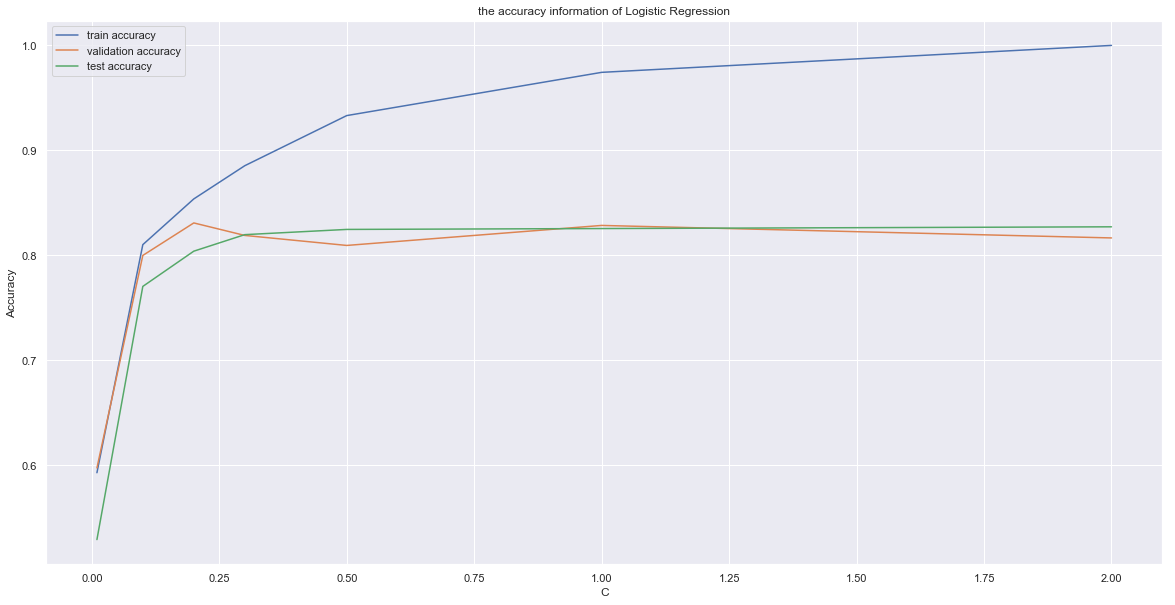

In [17]:
plt.figure(figsize=(20,10))
sn.set(style="darkgrid")
plt.title('the accuracy information of Logistic Regression')
plt.xlabel("C")
plt.ylabel('Accuracy')

sn.lineplot(Cs, train_accsLOG,label = 'train accuracy')
sn.lineplot(Cs,valid_accsLOG, label = 'validation accuracy')
sn.lineplot(Cs,test_accsLOG, label = 'test accuracy')
plt.legend()
# plt.show()
plt.savefig('the accuracy information of Logistic Regression.png')

In [18]:
Cs = [0.01, 0.1,0.2, 0.3, 0.5, 1,2]
train_accsSVM = []
valid_accsSVM = []
test_accsSVM = []
for C in Cs:
    print ('c = %f'%C)
    train_acc, vali_acc, acc = words.predictSVM(C = C)
    train_accsSVM.append(train_acc)
    valid_accsSVM.append(vali_acc)
    test_accsSVM.append(acc)

c = 0.010000

Accuracy on the IMDB train dataset using SVM: 73.45

Accuracy on the IMDB validation dataset using SVM: 72.62

Accuracy on the IMDB dataset using SVM: 68.72
c = 0.100000

Accuracy on the IMDB train dataset using SVM: 91.17

Accuracy on the IMDB validation dataset using SVM: 82.14

Accuracy on the IMDB dataset using SVM: 82.60
c = 0.200000

Accuracy on the IMDB train dataset using SVM: 96.24

Accuracy on the IMDB validation dataset using SVM: 83.33

Accuracy on the IMDB dataset using SVM: 82.52
c = 0.300000

Accuracy on the IMDB train dataset using SVM: 98.45

Accuracy on the IMDB validation dataset using SVM: 82.62

Accuracy on the IMDB dataset using SVM: 82.81
c = 0.500000

Accuracy on the IMDB train dataset using SVM: 100.00

Accuracy on the IMDB validation dataset using SVM: 81.43

Accuracy on the IMDB dataset using SVM: 82.06
c = 1.000000

Accuracy on the IMDB train dataset using SVM: 100.00

Accuracy on the IMDB validation dataset using SVM: 80.71

Accuracy on the IM

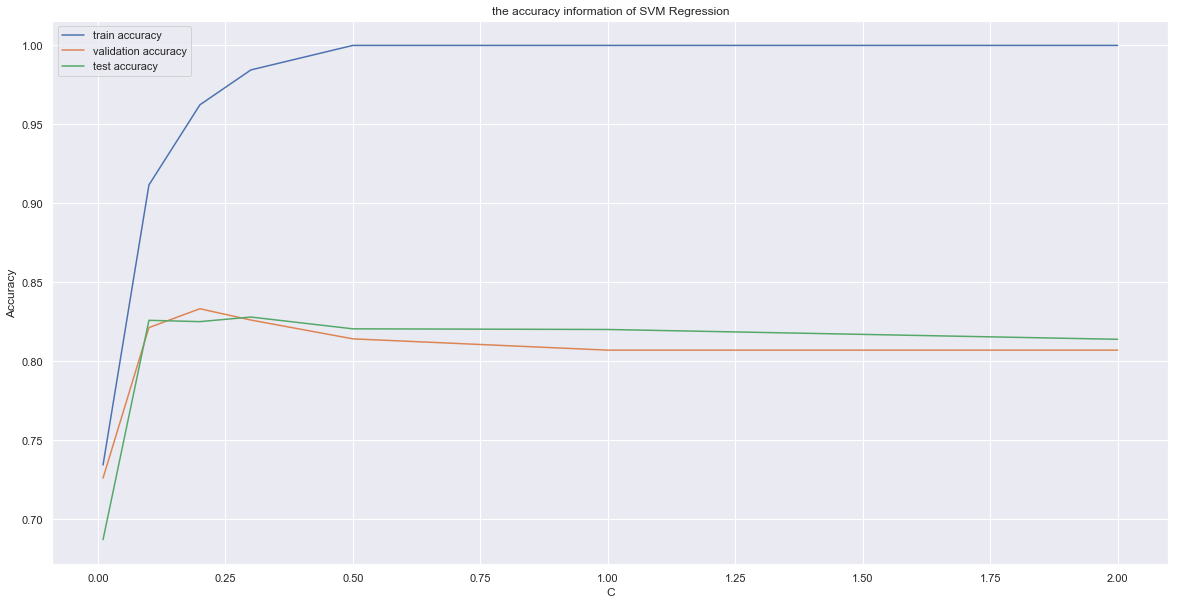

In [20]:
plt.figure(figsize=(20,10))
sn.set(style="darkgrid")
plt.title('the accuracy information of SVM Regression')
plt.xlabel("C")
plt.ylabel('Accuracy')
# Plot the responses for different events and regions
sn.lineplot(x=Cs, y=train_accsSVM,label = 'train accuracy')
sn.lineplot(Cs,valid_accsSVM, label = 'validation accuracy')
sn.lineplot(Cs,test_accsSVM, label = 'test accuracy')
plt.legend()
# plt.show()

plt.savefig('the accuracy information of SVM Regression.png')

## In this case, we choose the C with the highest validation accuracy for both classifier(C = 0.5 for logistic and C = 0.2 for SVM)

In [10]:
words.predictLogistic(C = 0.5)
words.predictSVM(C = 0.2)

[LibLinear]
Accuracy on the IMDB train dataset using Logistic: 93.32

Accuracy on the IMDB validation dataset using Logistic: 80.95

Accuracy on the IMDB dataset using Logistic Regression: 82.48

Accuracy on the IMDB train dataset using SVM: 96.24

Accuracy on the IMDB validation dataset using SVM: 83.33

Accuracy on the IMDB dataset using SVM: 82.52


(0.9624105011933174, 0.8333333333333334, 0.8251864125932062)

In [11]:
predicty_train = list(words.y_trainhat)
expecty_train = list(words.y_train)

predicty_vali = list(words.y_validation)
expecty_vali = list(words.y_test)

predicty_test = list(words.y_pred)
expecty_test = list(words.testData['sentiment'])

In [12]:
print (predicty_train[0:10])
print (expecty_train[0:10])

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


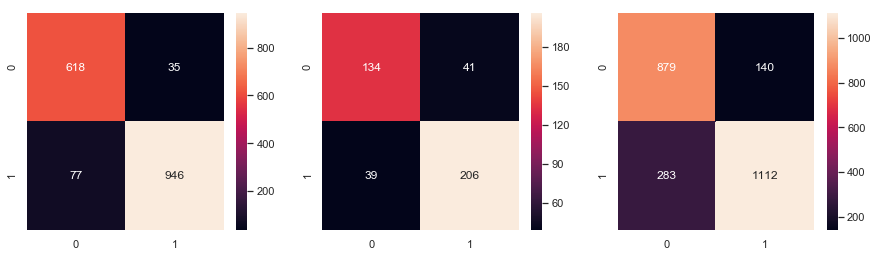

In [13]:
fig = plt.figure(figsize = (15,4))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
trainMatrix = confusion_matrix(predicty_train, expecty_train, labels = [0, 1])

sn.heatmap(trainMatrix, annot=True,fmt="d", ax = ax1)

ax2 = fig.add_subplot(gs[0, 1])
validationMatrix = confusion_matrix(predicty_vali, expecty_vali, labels = [0, 1])
sn.heatmap(validationMatrix, annot=True,fmt="d")

# spans two rows:
ax3 = fig.add_subplot(gs[0, 2])
testMatrix = confusion_matrix(predicty_test, expecty_test, labels = [0, 1])
sn.heatmap(testMatrix, annot=True,fmt="d")

plt.savefig("confusingmatrix.png")